In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel("/Users/carla/desktop/ga/Final Project Dataset/Combined Results.xlsx")
df.head(2)

,DocumentId,UnitId,Confidentiality,Status,Query Name,Country,Year,Page,Context,Context 1,...,DocumentId2,Prog,Year2,Code,Region,CountryGroup,Fragile,Small,Export earnings,ACT
0,"Albania - 2016 Article IV Consultation, Sevent...",62,Official Use Only,Match,queryA,Albania,2016,3,NaN,NaN,...,"Albania - 2016 Article IV Consultation, Sevent...",EFF,2016,ALB,EUR,EM,-,-,Services,-
1,"Albania - 2008 Article IV Consultation, Fifth ...",332,Official Use Only,Match,queryA,Albania,2008,31,Staff Appraisal,NaN,...,"Albania - 2008 Article IV Consultation, Fifth ...",PRGF EFF,2008,ALB,EUR,EM,-,-,Services,-


In [2]:
# List column headers
list(df)

['DocumentId',
 'UnitId',
 'Confidentiality',
 'Status',
 'Query Name',
 ' Country',
 'Year',
 'Page',
 'Context',
 'Context 1',
 ' Context 2',
 ' Query',
 'Terms',
 'text',
 'Tag',
 'DocumentId2',
 'Prog',
 'Year2',
 'Code',
 'Region',
 'CountryGroup',
 'Fragile',
 'Small',
 'Export earnings',
 'ACT']

In [3]:
#Limit sample to evenhandedness-narrow
en_df=df[df.Tag=='Evenhandedness - narrow']

print(en_df.shape)
print(df.shape)

#Which country has most mentions of evenhandedness?
en_df['Code'].value_counts().head()

(130, 25)
(29361, 25)


ARM    11
GRC    11
GEO    11
PAK    10
UKR     9
Name: Code, dtype: int64

In [4]:
en_df.groupby('Year2').Year2.value_counts()

Year2  Year2
2008   2008     12
2009   2009     24
2010   2010      2
2011   2011     10
2012   2012      7
2013   2013     23
2014   2014     14
2015   2015     19
2016   2016     10
2017   2017      9
Name: Year2, dtype: int64

(array([12., 24.,  2., 10.,  7., 23., 14., 19., 19.]),
 array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]),
 <a list of 9 Patch objects>)

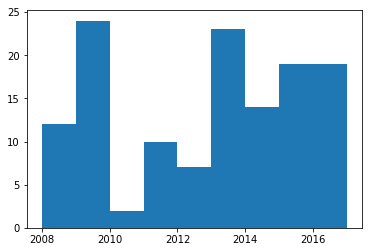

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(en_df.Year2, bins=np.arange(en_df.Year2.min(), en_df.Year2.max()+1))

In [6]:
from textblob import TextBlob, Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [7]:
print(en_df.text)

20383    Directors supported the authorities' efforts t...
20384    As for longer-term prospects, we strongly supp...
20385    It is important for the legitimacy and credibi...
20386    Current Classification: Available to the Publi...
20387    As members who know me know, I am always conce...
20388    We are, vis-Ã -vis some of the most catastroph...
20389    First, it is very important to have the proper...
20390    I have often raised the issue of evenhandednes...
20391    (â‚¬305 million) are programmed to fill a fisc...
20392    There was a question related to evenhandedness...
20393    Mr. Bartkus reiterated that the issue of fuel ...
20394    Fund's CEMAC team has plans to analyze spillov...
20395    Like Mr. Yambaye, we believe that the Fund sho...
20396    I have two remarks on the HIPC. We have rules ...
20397    These are observations. I would appreciate it ...
20398    We are concerned about evenhandedness and we w...
20399    Mr. Rouai noted that Mr. Flanagan had referred.

In [8]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    #return TextBlob(text.decode('utf-8')).sentiment.polarity
    return TextBlob(text).sentiment.polarity

In [9]:
df['sentiment'] = df.text.apply(detect_sentiment)
en_df=df[df.Tag=='Evenhandedness - narrow']

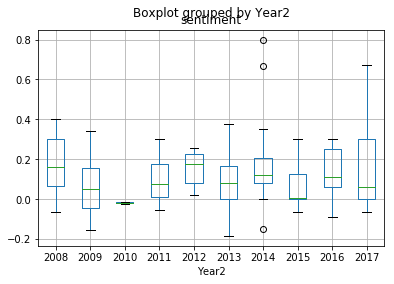

In [10]:
# box plot of sentiment grouped by stars
en_df.boxplot(column='sentiment', by='Year2')

In [11]:
en_df[en_df.sentiment <0].text

20391    (â‚¬305 million) are programmed to fill a fisc...
20395    Like Mr. Yambaye, we believe that the Fund sho...
20404    December of 2014 on a lapse-of-time basis. The...
20405    Mr. Itam commended management's rapid response...
20412    Fund be discussed as general policy matter. We...
20414    Lithuanian government has taken measures of 8 ...
20416    62 STRICTLY CONFIDENTIAL expense of those earn...
20420    Ms. Terracol supported other Directors in seek...
20425    Having said that, it is important for staff to...
20429    Secrecy and lack of evenhandedness in such del...
20431    Why is this done only for Guinea Bissau? We do...
20433    Hemisphere does not receive sufficient Fund su...
20443    We support the extension of the arrangement an...
20447    We note authorities' intention to provide tax ...
20452    Ms. Agudelo registered her agreement with Mr. ...
20455    I want to follow-up on the comments made by Mr...
20460    Directors asked two questions related to Fund .

In [12]:
#word encoding
import codecs #word encoding
import glob #regex
import multiprocessing #concurrency
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold #dimensionality reduction

In [13]:
nltk.download('punkt') #pretrained tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/carla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/carla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Import the corpus from excel file
raw_corpus = u"".join(df['text']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 13,397,345 characters


In [15]:
#Split corpus into sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [16]:
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

We have 81,585 raw sentences


In [17]:
#convert into a list of words
#remove unnnecessary,, split into words, no hyphens, list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [18]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [19]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

It is fair to say that We note that risks to the program remain high, in part due to external risks to the economic outlook but notably due to uncertainties surrounding revenue mobilization.
['It', 'is', 'fair', 'to', 'say', 'that', 'We', 'note', 'that', 'risks', 'to', 'the', 'program', 'remain', 'high', 'in', 'part', 'due', 'to', 'external', 'risks', 'to', 'the', 'economic', 'outlook', 'but', 'notably', 'due', 'to', 'uncertainties', 'surrounding', 'revenue', 'mobilization']


In [20]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,998,787 tokens


In [21]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [22]:
word2vec_eh  = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [23]:
word2vec_eh.build_vocab(sentences)

In [24]:
print("Word2Vec vocabulary length:", len(word2vec_eh.wv.vocab))

Word2Vec vocabulary length: 10384


In [25]:
#Training
word2vec_eh.train(sentences, total_examples=word2vec_eh.corpus_count, epochs=5)

(7360113, 9993935)

In [26]:
word2vec_eh.save("word2vec_model_trained_eh_text.w2v")
print("Model saved")

Model saved


In [27]:
import gensim
word2vec_eh = w2v.Word2Vec.load("word2vec_model_trained_eh_text.w2v")
print("Model loaded")

Model loaded


In [28]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=42)

In [29]:
all_word_vectors_matrix = word2vec_eh.wv.vectors

In [30]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [31]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[word2vec_eh.wv.vocab[word].index])
            for word in word2vec_eh.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [32]:
points.head(20)

,word,x,y
0,On,-31.163763,-47.937473
1,behalf,-17.341188,-48.274063
2,of,20.226660,4.133691
3,our,-12.002688,-46.365234
4,Albanian,-23.163511,-10.292063
5,authorities,-29.892500,-6.001727
6,we,-35.958588,-7.580553
7,wish,-19.387775,-48.236099
8,to,-14.576601,4.477918
9,thank,-6.077672,-65.525299


In [33]:
sns.set_context("poster")

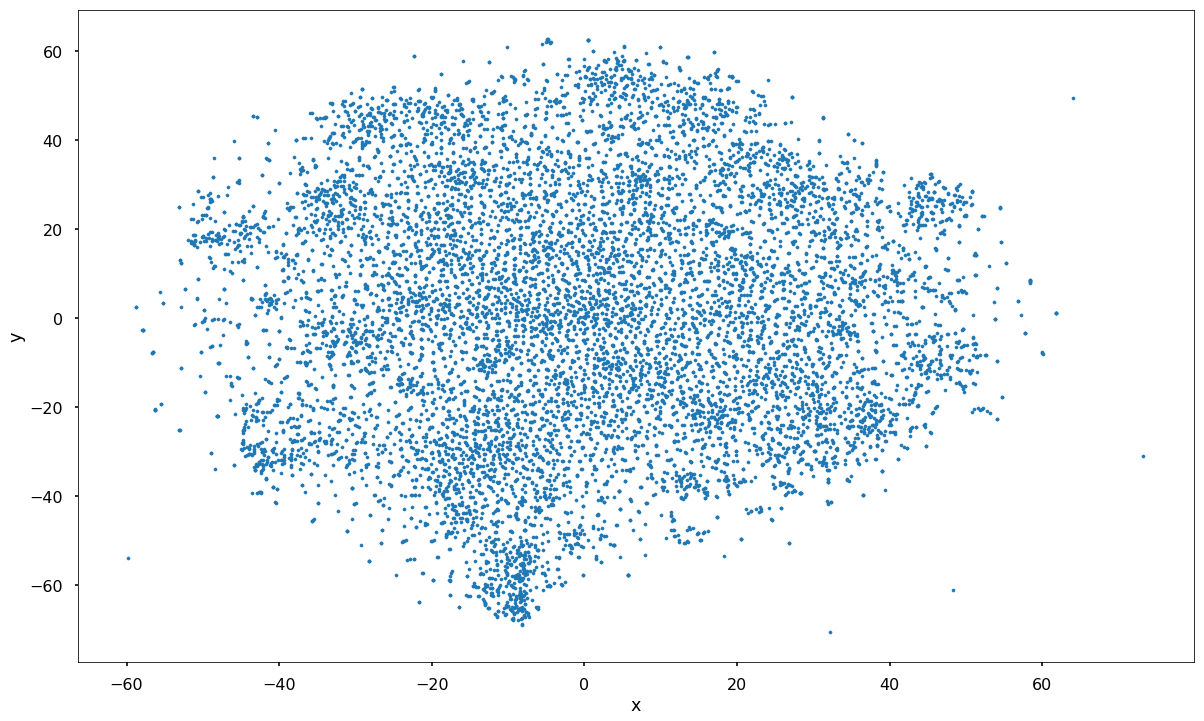

In [34]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [35]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

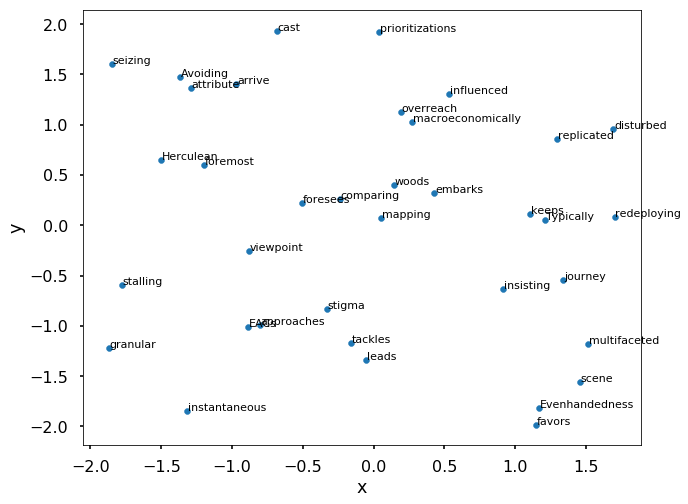

In [48]:
plot_region(x_bounds=(-2,2), y_bounds=(-2, 2))

In [37]:
word2vec_eh.wv.most_similar("evenhandedness")

[('uniformity', 0.7727742791175842),
 ('SPR', 0.667747974395752),
 ('answer', 0.642695963382721),
 ('sake', 0.617462158203125),
 ('Again', 0.6155415177345276),
 ('clarity', 0.6070318222045898),
 ('everybody', 0.5966655611991882),
 ('voice', 0.596454918384552),
 ('principle', 0.5937870144844055),
 ('precedents', 0.591332733631134)]

In [47]:
word2vec_eh.wv.most_similar("uncertainty")

[('uncertainties', 0.745779275894165),
 ('transitions', 0.6651838421821594),
 ('uncertain', 0.6389660835266113),
 ('surrounding', 0.6188217997550964),
 ('unstable', 0.6184409856796265),
 ('pronounced', 0.601675271987915),
 ('delicate', 0.59615558385849),
 ('geopolitical', 0.5943312048912048),
 ('prevailing', 0.5922622084617615),
 ('emblematic', 0.5919478535652161)]

In [39]:
word2vec_eh.wv.doesnt_match("governance again corruption crime evenhanded".split())

'evenhanded'

In [40]:
# This will give the total number of words in the vocabolary created from this dataset
word2vec_eh.wv.vectors.shape

(10384, 300)

In [45]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = word2vec_eh.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [46]:
nearest_similarity_cosmul("evenhandedness", "uniformity", "corruption")

evenhandedness is related to uniformity, as fight is related to corruption


'fight'

Help I got:<br>
    http://migsena.com/build-and-visualize-word2vec-model-on-amazon-reviews/<br>
    https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/Thrones2Vec.ipynb    <br>
    https://www.kaggle.com/varun08/sentiment-analysis-using-word2vec